In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import cross_validation
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)

import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

import sklearn.linear_model

In [2]:
df = pd.read_csv("yellow_tripdata_2015-01-1p.csv")
df.head()

/Users/rajashreebaradur/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,Duration,trip_duration,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood
0,1,1/29/15 9:00,1/29/15 9:20,0:20,20,1,1.90,-74.005905,40.735645,1,...,1,13.5,0.0,0.5,1.70,0.00,0.3,16.00,Manhattan,West Village
1,1,1/16/15 21:59,1/16/15 22:09,0:10,10,1,1.30,-73.988808,40.721855,1,...,1,8.0,0.5,0.5,1.85,0.00,0.3,11.15,Manhattan,Lower East Side
2,2,1/9/15 19:29,1/9/15 19:35,0:06,6,1,0.35,-73.980316,40.742496,1,...,2,5.0,1.0,0.5,0.00,0.00,0.3,6.80,Manhattan,Kips Bay
3,1,1/28/15 14:28,1/28/15 14:48,0:20,20,2,7.90,-73.873108,40.774086,1,...,1,24.0,0.0,0.5,0.00,5.33,0.3,30.13,Queens,LaGuardia Airport
4,2,1/22/15 7:08,1/22/15 7:14,0:06,6,1,1.29,-73.961906,40.763901,1,...,1,6.5,0.0,0.5,1.46,0.00,0.3,8.76,Manhattan,Upper East Side


In [3]:
df['log_total_amount'] = df['total_amount'].apply(lambda x: np.log(x))

In [4]:
df['trip_duration'] = df['trip_duration'].convert_objects(convert_numeric=True)

/Users/rajashreebaradur/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [5]:
df[['trip_duration']] = df[['trip_duration']].apply(pd.to_timedelta)

In [6]:
df[['trip_duration']] = df[['trip_duration']].apply(pd.to_numeric)

In [7]:
df.replace(to_replace=np.inf, value=np.NaN, inplace=True)

In [8]:
df.describe()

,VendorID,trip_duration,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,log_total_amount
count,127490.000000,127488.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,1.274530e+05
mean,1.520535,12.095005,1.681567,2.782500,-72.543729,39.962788,1.036921,-72.590987,39.989797,1.385293,11.900871,0.308217,0.497776,1.561781,0.243486,0.283276,14.811335,-inf
std,0.499580,8.592735,1.340551,3.403465,10.188356,5.612579,0.668754,10.020768,5.520446,0.498167,10.110382,0.361912,0.035273,3.353501,1.210873,0.068829,12.514612,NaN
min,1.000000,0.000000,0.000000,0.000000,-75.254013,0.000000,1.000000,-75.254036,0.000000,1.000000,-75.000000,-1.000000,-0.500000,-1.000000,0.000000,0.000000,-75.300000,-inf
25%,1.000000,6.000000,1.000000,1.000000,-73.991631,40.735592,1.000000,-73.991173,40.734398,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000,2.099244e+00
50%,2.000000,10.000000,1.000000,1.675000,-73.981575,40.753128,1.000000,-73.979752,40.753632,1.000000,9.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.160000,2.412336e+00
75%,2.000000,16.000000,2.000000,3.000000,-73.966629,40.767555,1.000000,-73.962555,40.768742,2.000000,13.500000,0.500000,0.500000,2.080000,0.000000,0.300000,16.300000,2.791165e+00
max,2.000000,59.000000,6.000000,99.900000,0.000000,41.570671,99.000000,0.000000,41.745903,4.000000,551.110000,7.000000,0.500000,700.000000,29.750000,0.300000,732.300000,6.596190e+00


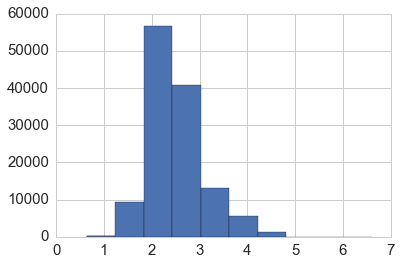

In [9]:
df.replace([np.inf, -np.inf], np.nan)
df = df[df['log_total_amount'] > 0]
df['log_total_amount'].hist()

In [16]:
def get_dt(x):
    return datetime.strptime(x, '%m/%d/%y %H:%M')

df['tpep_pickup_datetime'] = df.apply(lambda x: get_dt(x[1]), axis=1)
df['tpep_dropoff_datetime'] = df.apply(lambda x: get_dt(x[2]), axis=1)

df['tpep_pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
#df['tpep_dropoff_dayofweek'] = df['tpep_dropoff_datetime'].dt.dayofweek

#df['tpep_pickup_time'] = df['tpep_pickup_time'].astype("int")
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

#df['tpep_pickup_minuteofday'] = df['tpep_pickup_time'].apply(lambda x: x.hour) * 60 + df['tpep_pickup_time'].apply(lambda x: x.minute)
#df['tpep_dropoff_time'] = df['tpep_dropoff_datetime'].dt.time

In [17]:
df = df.drop(['store_and_fwd_flag',
              'pickup_longitude',
              'pickup_latitude',
              'tpep_pickup_datetime', 
              'tpep_dropoff_datetime',
              'dropoff_longitude',
              'dropoff_latitude'], axis=1)

In [18]:
df = df[df['RateCodeID'] == 1]
df = df[df['borough'] == 'Manhattan']
df = df[df['passenger_count']!= 0]
df = df[df['trip_distance']!= 0]
df = df[df['fare_amount'] > 0]
df = df[df['borough']!= '0']
df.head()

,VendorID,Duration,trip_duration,passenger_count,trip_distance,RateCodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood,log_total_amount,tpep_pickup_dayofweek,tpep_pickup_hour
0,1,0:20,20.0,1,1.90,1,1,13.5,0.0,0.5,1.70,0.0,0.3,16.00,Manhattan,West Village,2.772589,3,9
1,1,0:10,10.0,1,1.30,1,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15,Manhattan,Lower East Side,2.411439,4,21
2,2,0:06,6.0,1,0.35,1,2,5.0,1.0,0.5,0.00,0.0,0.3,6.80,Manhattan,Kips Bay,1.916923,4,19
4,2,0:06,6.0,1,1.29,1,1,6.5,0.0,0.5,1.46,0.0,0.3,8.76,Manhattan,Upper East Side,2.170196,3,7
5,1,0:17,17.0,1,1.30,1,1,11.5,0.0,0.5,2.45,0.0,0.3,14.75,Manhattan,Upper East Side,2.691243,1,13


In [27]:
df_grouped = df.groupby(by=['neighborhood']).count()
df_grouped

#df_grouped.to_csv('/Users/rajashreebaradur/Desktop/grouped.csv', sep='\t')

VendorID  Duration  trip_duration  \
tpep_pickup_hour neighborhood                                             
0                Battery Park City          10        10             10   
                 Central Park               27        27             27   
                 Chelsea                   366       366            366   
                 Chinatown                  29        29             29   
                 Civic Center                4         4              4   
                 East Harlem                33        33             33   
                 East Village              378       378            378   
                 Financial District         61        61             61   
                 Flatiron District          78        78             78   
                 Gramercy                  134       134            134   
                 Greenwich Village         147       147            147   
                 Harlem                     31        31             31   
                 Hell's Kitchen            272       272            272   
                 Inwood                      2         2              2   
                 Kips Bay                   99        99             99   
                 Little Italy                8         8              8   
                 Lower East Side           188       188            188   
                 Midtown                   680       680            680   
                 Morningside Heights        13        13             13   
                 Murray Hill                93        93             93   
                 NoHo                       57        57             57   
                 Nolita                     39        39             39   
                 SoHo                      107       107            107   
                 Stuyvesant Town            19        19             19   
                 Theater District          209       209            209   
                 Tribeca                    91        91             91   
                 Upper East Side           385       385            385   
                 Upper West Side           297       297            297   
                 Washington Heights         14        14             14   
                 West Village              283       283            283   
...                                        ...       ...            ...   
23               Chelsea                   494       494            494   
                 Chinatown                  30        30             30   
                 Civic Center                7         7              7   
                 East Harlem                48        48             48   
                 East Village              396       396            396   
                 Financial District         88        88             88   
                 Flatiron District          92        92             92   
                 Gramercy                  157       157            157   
                 Greenwich Village         164       164            164   
                 Harlem                     31        31             31   
                 Hell's Kitchen            309       309            309   
                 Inwood                      1         1              1   
                 Kips Bay                  108       108            108   
                 Little Italy               17        17             17   
                 Lower East Side           183       183            183   
                 Midtown                   967       967            967   
                 Morningside Heights        18        18             18   
                 Murray Hill               132       132            132   
                 NoHo                       70        70             70   
                 Nolita                     47        47             47   
                 Roosevelt Island            1         1       

(0, 20)

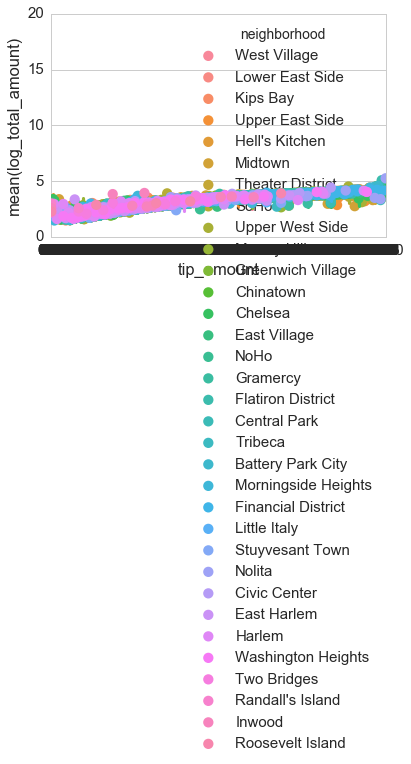

In [35]:
g = sns.pointplot(data=df, x='tip_amount', y='log_total_amount', hue='neighborhood')
#sns.barplot(x='tpep_pickup_dayofweek', y='total_amount', hue = 'neighborhood', data=df)
plt.ylim(0, 20)

In [ ]:
g = sns.pairplot(df, vars=['log_total_amount', 'tpep_pickup_dayofweek', 'tpep_pickup_hour', 'trip_distance'], hue="neighborhood")

In [ ]:
# visualize the relationship between the features and the response using scatterplots
df.plot(kind ='scatter', x='tpep_pickup_hour', y='total_amount', alpha=0.1)
plt.xlabel('Hour')
plt.ylabel('Total Amount')
plt.axis([0, 24, 0, 100])
plt.grid(True)
plt.show()

In [ ]:
# visualize the relationship between the features and the response using scatterplots
df.plot(kind ='scatter', x='tpep_pickup_dayofweek', y='total_amount', alpha=0.1)
plt.xlabel('Day of Week')
plt.ylabel('Total Amount')
plt.axis([-1, 7, 0, 100])
plt.grid(True)
plt.show()

In [ ]:
sns.boxplot(x='tpep_pickup_dayofweek', y='total_amount', data=df)
plt.ylim(0, 150)

In [ ]:
sns.boxplot(x='tpep_pickup_hour', y='total_amount', data=df)
plt.ylim(0, 150)

In [ ]:
df = df.join(pd.get_dummies(df['tpep_pickup_hour'], prefix='hour'))
df = df.join(pd.get_dummies(df['tpep_pickup_dayofweek'], prefix='week'))
df = df.join(pd.get_dummies(df['neighborhood'], prefix='n'))
#df = pd.get_dummies(df).astype(np.int8)
df.head()

In [ ]:
df = df.drop(['VendorID',
              'neighborhood',
              'RateCodeID',
              'tpep_pickup_dayofweek',
              'tpep_pickup_hour',
              'borough'], axis=1)

In [ ]:
df.dtypes

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(300, 10, as_cmap=True)

correlations = df.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap, ax=ax)

In [ ]:
import statsmodels.formula.api as smf

y = df['total_amount']
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ hour_0 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23 + week_0 + week_1 + week_2 + week_3 + week_4 + week_5 + week_6' , data=df).fit()
#print the full summary
lm.summary()

In [ ]:
# Set target variable name
target = 'total_amount'

# Set X and y
X = df.drop([target], axis=1)
y = df[target]


# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)


# check size of training set
print X_train.shape, y_train.shape

# check size of test set
print X_test.shape, y_test.shape

In [ ]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    #plot hist of errors
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo

lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X_train, y_train, lm)

In [ ]:
kf = cross_validation.KFold(len(X_train), n_folds=5, shuffle=True)

In [ ]:
from sklearn import metrics

mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X_train.iloc[train_index], y_train.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y_train.iloc[test_index], lm.predict(X_train.iloc[test_index])))
    scores.append(lm.score(X_train, y_train))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

In [ ]:
lm = linear_model.LinearRegression().fit(X_train, y_train)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'R2: ', lm.score(X_train, y_train)

In [ ]:
# fit linear regression using no regularization (OLS)
lm = linear_model.LinearRegression().fit(X_train, y_train)
print "~~~ No regularization (OLS) ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'OLS R2:', lm.score(X_train, y_train)

# fit linear regression using L1 regularization (Lasso)
lm = linear_model.Lasso().fit(X_train, y_train)
print "~~~ L1 regularization (Lasso) ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Lasso R2:', lm.score(X_train, y_train)

# fit linear regression using L2 regularization (Ridge)
lm = linear_model.Ridge().fit(X_train, y_train)
print "~~~ L2 regularization (Ridge) ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Ridge R2:', lm.score(X_train, y_train)

In [ ]:
alphas = np.logspace(-10, 10, 21)
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(X_train, y_train)
    print metrics.mean_squared_error(y_train, lm.predict(X_train))

In [ ]:
# import grid search
from sklearn import grid_search

# pick range of values to search with
alphas = np.logspace(-10, 10, 21)

# use grid search CV to find best value
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')
gs.fit(X_train, y_train)

In [ ]:
print gs.best_estimator_

In [ ]:
print gs.grid_scores_

In [ ]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach

In [ ]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
n_iter = 0
while not optimized:
    if n_iter > 3:
        print 'stopping iterations'
        break
    n_iter += 1
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach

In [ ]:
lm = linear_model.SGDRegressor()
lm.fit(X_train, y_train)
print "Gradient Descent MSE:", metrics.mean_squared_error(y_train, lm.predict(X_train))
print "Gradient Descent R2:", lm.score(X_train, y_train)

In [ ]:
lm = linear_model.SGDRegressor()
lm.fit(X_test, y_test)
print "Gradient Descent MSE:", metrics.mean_squared_error(y_test, lm.predict(X_test))
print "Gradient Descent R2:", lm.score(X_test, y_test)